## Getting Partial Dependence Plot

**Author**: Thodoris Petropoulos

**Label**: Evaluating Models

### Scope
The scope of this notebook is to provide instructions on how to get the Partial Dependence Plot of a specific model using the Python API.

### Background
Partial dependence conveys how changes to the value of each feature change model predictions if everything else remained unchanged. You can find the partial dependence plot in the "Feature Effects" tab interface.

### Requirements

- Python version 3.7.3
-  DataRobot API version 2.19.0. 
Small adjustments might be needed depending on the Python version and DataRobot API version you are using.

Full documentation of the Python package can be found here: https://datarobot-public-api-client.readthedocs-hosted.com

It is assumed you already have a DataRobot <code>Project</code> object and a DataRobot <code>Model</code> object.

#### Import Libraries

In [6]:
import datarobot as dr
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import pandas as pd

#### Requesting Feature Effects (Partial Dependence)

In [3]:
feature_effects = model.request_feature_effect()
feature_effects.wait_for_completion() #Wait till feature effects computes

#### Plot Partial Dependence for a Specific Feature

In [1]:
def plot_partial_dependence_column(feature_effects, column):
     
    temp_pd = list(feature_effects.get_result())
    for item in temp_pd:
        if item['feature_name'] == column:
            partial_dependence_data = item['partial_dependence']['data']
            partial_dependence_data_df = pd.DataFrame(partial_dependence_data) #Save results into a pandas dataframe
            partial_dependence_data_df.columns = ['target_probability','value']
    plt.figure(figsize=(16, 6))
    ax = sns.lineplot(x="value", y="target_probability", data=partial_dependence_data_df)#.set_title('Partial Dependence plot for %s'%column)
    return partial_dependence_data_df
    

,target_probability,value
0,0.344432,Not Available
1,0.356704,Emergency
2,0.396478,==Missing==
3,0.396478,Newborn
4,0.396426,Urgent
5,0.412654,Elective
6,0.396478,=Other Unseen=
7,0.379232,Not Mapped


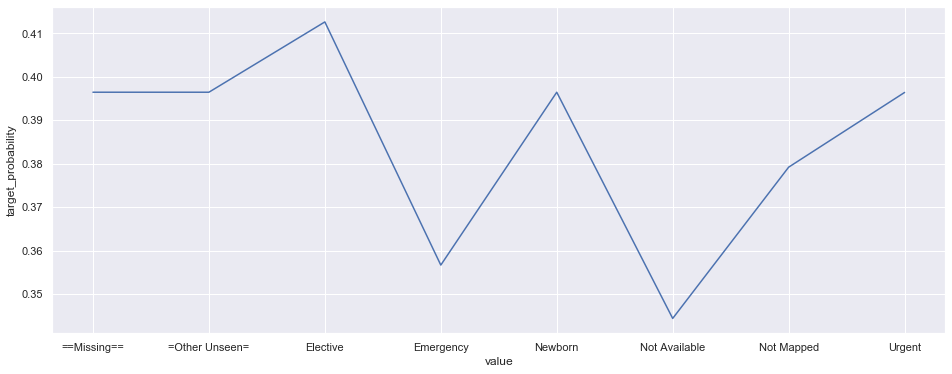

In [27]:
plot_partial_dependence_column(feature_effects,'admission_type_id') #Fill in your own column